In [1]:
'''
Data source: https://www.kaggle.com/kingburrito666/shakespeare-plays

Note: S's plays contain English, Latin, French, made up dialects, and nonsense.

RUN Project-04_NLP_Shakespeare_All_cleaning.ipynb first'''

"\nData source: https://www.kaggle.com/kingburrito666/shakespeare-plays\n\nNote: S's plays contain English, Latin, French, made up dialects, and nonsense."

In [36]:
#!pip install wordcloud

In [2]:
import pickle
import pandas as pd
import string
import re
import numpy as np

import nltk
from nltk.corpus import stopwords

from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
# Load the dataframe containing all of Shakespeare's plays' lines.
df = pickle.load( open( "shake_plays.p", "rb" ) )

In [8]:
df

,Play,PlayerLine
0,A Comedy of Errors,"Proceed, Solinus, to procure my fall,And by th..."
1,A Midsummer nights dream,"Now, fair Hippolyta, our nuptial hour,Draws on..."
2,A Winters Tale,"If you shall chance, Camillo, to visit Bohemia..."
3,Alls well that ends well,"In delivering my son from me, I bury a second ..."
4,Antony and Cleopatra,"Nay, but this dotage of our general's,O'erflow..."
5,As you like it,"As I remember, Adam, it was upon this fashion,..."
6,Coriolanus,"Before we proceed any further, hear me speak.,..."
7,Cymbeline,"You do not meet a man but frowns: our bloods,N..."
8,Hamlet,"Who's there?,Nay, answer me: stand, and unfold..."
9,Henry IV,"So shaken as we are, so wan with care,,Find we..."


In [9]:
df2 = df.copy()

In [10]:
df2.Play = df2.Play.apply(lambda x: x.title())

In [11]:
df2.PlayerLine = df2.PlayerLine.apply(lambda x: x.lower())
df2.PlayerLine = df2.PlayerLine.apply(lambda x: x.replace(string.punctuation, " "))
df2.PlayerLine = df2.PlayerLine.apply(lambda x: x.translate(string.digits))

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
df2.head()

,Play,PlayerLine
0,A Comedy Of Errors,"proceed, solinus, to procure my fall,and by th..."
1,A Midsummer Nights Dream,"now, fair hippolyta, our nuptial hour,draws on..."
2,A Winters Tale,"if you shall chance, camillo, to visit bohemia..."
3,Alls Well That Ends Well,"in delivering my son from me, i bury a second ..."
4,Antony And Cleopatra,"nay, but this dotage of our general's,o'erflow..."


In [14]:
# Load the list containing all of the players' names, split and lower cased.  For use in stop_words.
split_players = pickle.load( open( "shake_players.p", "rb" ) )

In [15]:
split_players

['',
 'abbot',
 'tranio',
 'peto',
 'ford',
 'timandra',
 'pyramus',
 'montano',
 'launce',
 'sixth',
 'brakenbury',
 'murder',
 'banditti',
 'belch',
 'pisanio',
 'trebonius',
 'helicanus',
 'mercutio',
 'bassianus',
 'french',
 'deiphobus',
 'scales',
 'westmoreland',
 'merchant',
 'juliet',
 'aeneas',
 'petruchio',
 'bardolph',
 'caliban',
 'proteus',
 'troilus',
 'clerk',
 'polonius',
 'menenius',
 'macmorris',
 'man',
 'spirit',
 'gardener',
 'talbot',
 'say',
 'menelaus',
 'conrade',
 'caphis',
 'pistol',
 'perdita',
 'ceres',
 'philostrate',
 'tutor',
 'vi',
 'forester',
 'strato',
 'musician',
 'macbeth',
 'bandit',
 'son',
 'luciana',
 'goneril',
 'others',
 'lartius',
 'lion',
 'cymbeline',
 'fool',
 'luce',
 'arviragus',
 'percy',
 'philo',
 'edward',
 'aumerle',
 'hecate',
 'pandar',
 'keeper',
 'cleopatra',
 'cardinal',
 'cassius',
 'publius',
 'menas',
 'duncan',
 'orlando',
 'mayor',
 'snout',
 'oberon',
 'malcolm',
 'cleon',
 'richmond',
 'viola',
 'outlaws',
 'seyton',

***Making the CountVectorizer***

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nataliepaley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df2['text_stemmed'] = df2.PlayerLine

In [18]:
#df2['text_stemmed'] = df2['text_stemmed'].apply(lambda s: re.sub(r'[\b\'d]', 'ed', s))
df2['text_stemmed'] = df2['text_stemmed'].apply(lambda s: re.sub(r'[\n\b\f\r\t\v\x00\,\.\?\!\:]', ' ', s))

In [19]:
df2.sample()

,Play,PlayerLine,text_stemmed
32,Troilus And Cressida,"in troy, there lies the scene. from isles of g...",in troy there lies the scene from isles of g...


In [20]:
default_stop = list(set(stopwords.words('english')))

In [90]:
my_stops = default_stop+['shall', 'hath', 'll', 'would', 'come', 'go',
                         'thee', 'thy', 'thou', 'tis', 'like', 'well', 'good', 'upon', 'god','let','one',
                        'ay', 'yet','may', 'make', 'us','see', 'know', 'give', 'fair', 'unto', 'doth', 'must',
                        'much','tell','made','day','men','mine', 'never', 'ever', 'think', 'take','though', 'st',
                        'done','call','art','therefore','rome','troy','gods','two','nay','away','way','ye',
                        'three','thus','indeed','comes','heart','england','hear','whose','er','hi','ti','u',
                        "i'll"]+split_players

In [41]:
vectorizer = CountVectorizer(#ngram_range=(1, 2),  
                                   stop_words=my_stops, token_pattern="\\b[a-z][a-z]+\\b")
doc_word = vectorizer.fit_transform(df2.text_stemmed)
doc_word.shape

(36, 21479)

In [42]:
# We have to convert `.toarray()` because the vectorizer returns a sparse matrix.
# For a big corpus, we would skip the dataframe and keep the output sparse.
pd.DataFrame(doc_word.toarray(), index=df2.PlayerLine, columns=vectorizer.get_feature_names()).head(1)

abaissiez  abandon  \
PlayerLine                                                               
proceed, solinus, to procure my fall,and by the...          0        0   

                                                    abandoned  abase  abash  \
PlayerLine                                                                    
proceed, solinus, to procure my fall,and by the...          0      0      0   

                                                    abate  abated  abatement  \
PlayerLine                                                                     
proceed, solinus, to procure my fall,and by the...      0       0          0   

                                                    abatements  abates  ...  \
PlayerLine                                                              ...   
proceed, solinus, to procure my fall,and by the...           0       0  ...   

                                                    zenelophon  zenith  \
PlayerLine                                                               
proceed, solinus, to procure my fall,and by the...           0       0   

                                                    zephyrs  zir  zo  zodiac  \
PlayerLine                                                                     
proceed, solinus, to procure my fall,and by the...        0    0   0       0   

                                                    zodiacs  zone  zounds  \
PlayerLine                                                                  
proceed, solinus, to procure my fall,and by the...        0     0       0   

                                                    zwaggered  
PlayerLine                                                     
proceed, solinus, to procure my fall,and by the...          0  

[1 rows x 21479 columns]

***THIS SECTION IS NMF***

In [43]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_word)

In [44]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             columns = vectorizer.get_feature_names())
topic_word.head()

,abaissiez,abandon,abandoned,abase,abash,abate,abated,abatement,abatements,abates,...,zenelophon,zenith,zephyrs,zir,zo,zodiac,zodiacs,zone,zounds,zwaggered
0,0.000,0.000,0.009,0.000,0.000,0.000,0.026,0.029,0.009,0.008,...,0.000,0.008,0.015,0.025,0.012,0.000,0.005,0.009,0.000,0.012
1,0.000,0.053,0.001,0.000,0.000,0.031,0.000,0.008,0.005,0.000,...,0.011,0.000,0.000,0.004,0.002,0.000,0.000,0.005,0.005,0.002
2,0.000,0.000,0.009,0.031,0.000,0.025,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.011,0.001,0.000,0.111,0.000
3,0.022,0.024,0.000,0.000,0.026,0.107,0.005,0.000,0.000,0.000,...,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.108,0.000
4,0.000,0.045,0.002,0.000,0.000,0.016,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.078,0.000


In [45]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [46]:
display_topics(nmf_model, vectorizer.get_feature_names(), 15)


Topic  0
great, honour, noble, pray, life, poor, cannot, could, nature, nothing, look, fear, heaven, put, might

Topic  1
love, night, sweet, look, madam, eyes, true, death, cannot, wit, word, nothing, dead, dear, eye

Topic  2
death, blood, life, hand, grace, crown, soul, fear, dead, live, heaven, die, noble, look, hast

Topic  3
great, blood, love, sweet, true, hand, name, peace, many, faith, honour, every, look, war, full

Topic  4
pray, love, husband, house, woman, marry, life, better, name, signior, home, leave, money, look, till


In [47]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5), index=df2.Play)
doc_topic_nmf

,0,1,2,3,4
Play,,,,,
A Comedy Of Errors,0.30166,0.00000,1.66063,0.00000,7.47956
A Midsummer Nights Dream,0.03760,8.69744,0.54879,1.52760,0.00000
A Winters Tale,6.92527,1.48674,0.64334,0.42401,0.76489
Alls Well That Ends Well,5.51575,3.21404,0.00000,0.22948,2.40353
Antony And Cleopatra,6.38748,1.98861,1.46961,1.75357,0.00000
As You Like It,0.69928,6.67272,0.00000,1.88550,4.30389
Coriolanus,7.30246,0.00000,0.00000,5.35960,0.00000
Cymbeline,8.05551,1.83960,1.00491,0.41876,0.17380
Hamlet,5.70893,4.94369,2.16246,0.49563,1.04934


In [48]:
#comparing two documents using their arrays of topics to see how similar they are

for j in range(0,36):
    for i in range(1,36):
        print("{} similarity with {}: ".format(df2.Play[j], df2.Play[i]),
              cosine_similarity((doc_topic_nmf.values[j], doc_topic_nmf.values[i]))[1][0])


A Comedy Of Errors similarity with A Midsummer Nights Dream:  0.013600661471399952
A Comedy Of Errors similarity with A Winters Tale:  0.16158951382723657
A Comedy Of Errors similarity with Alls Well That Ends Well:  0.3753125853475834
A Comedy Of Errors similarity with Antony And Cleopatra:  0.08055942386136897
A Comedy Of Errors similarity with As You Like It:  0.5159112136353022
A Comedy Of Errors similarity with Coriolanus:  0.031716361477494376
A Comedy Of Errors similarity with Cymbeline:  0.08446351299553234
A Comedy Of Errors similarity with Hamlet:  0.2161696945251843
A Comedy Of Errors similarity with Henry Iv:  0.5300852313134485
A Comedy Of Errors similarity with Henry V:  0.15596775503272337
A Comedy Of Errors similarity with Henry Vi Part 1:  0.20723723969187258
A Comedy Of Errors similarity with Henry Vi Part 2:  0.3114015417662282
A Comedy Of Errors similarity with Henry Vi Part 3:  0.22999149016901604
A Comedy Of Errors similarity with Henry Viii:  0.18785647184517332


Antony And Cleopatra similarity with Hamlet:  0.8967028219110852
Antony And Cleopatra similarity with Henry Iv:  0.27225097332857345
Antony And Cleopatra similarity with Henry V:  0.288552530173013
Antony And Cleopatra similarity with Henry Vi Part 1:  0.3799803864906127
Antony And Cleopatra similarity with Henry Vi Part 2:  0.35116558645332385
Antony And Cleopatra similarity with Henry Vi Part 3:  0.2596923616555269
Antony And Cleopatra similarity with Henry Viii:  0.9151555902797642
Antony And Cleopatra similarity with Julius Caesar:  0.8883790239060373
Antony And Cleopatra similarity with King John:  0.3893303204789586
Antony And Cleopatra similarity with King Lear:  0.9445836981104239
Antony And Cleopatra similarity with Loves Labours Lost:  0.37234550213070494
Antony And Cleopatra similarity with Measure For Measure:  0.578976809125884
Antony And Cleopatra similarity with Merchant Of Venice:  0.2985829814839115
Antony And Cleopatra similarity with Merry Wives Of Windsor:  0.006783

Hamlet similarity with A Midsummer Nights Dream:  0.6427256830672751
Hamlet similarity with A Winters Tale:  0.8662315678115112
Hamlet similarity with Alls Well That Ends Well:  0.9228229803008278
Hamlet similarity with Antony And Cleopatra:  0.8967028219110852
Hamlet similarity with As You Like It:  0.652353980363925
Hamlet similarity with Coriolanus:  0.6165218862829052
Hamlet similarity with Cymbeline:  0.8708516299423178
Hamlet similarity with Hamlet:  1.0
Hamlet similarity with Henry Iv:  0.20412334808134097
Hamlet similarity with Henry V:  0.13870116746137237
Hamlet similarity with Henry Vi Part 1:  0.35760003707835863
Hamlet similarity with Henry Vi Part 2:  0.39168441463002296
Hamlet similarity with Henry Vi Part 3:  0.3297275204716167
Hamlet similarity with Henry Viii:  0.7581761036235227
Hamlet similarity with Julius Caesar:  0.8127666848514626
Hamlet similarity with King John:  0.3790037431222237
Hamlet similarity with King Lear:  0.9573051424898735
Hamlet similarity with Lo

Henry Vi Part 3 similarity with A Winters Tale:  0.11480474315133617
Henry Vi Part 3 similarity with Alls Well That Ends Well:  0.04818087494545547
Henry Vi Part 3 similarity with Antony And Cleopatra:  0.2596923616555269
Henry Vi Part 3 similarity with As You Like It:  0.10378082917279946
Henry Vi Part 3 similarity with Coriolanus:  0.07497190985690948
Henry Vi Part 3 similarity with Cymbeline:  0.14375712309701502
Henry Vi Part 3 similarity with Hamlet:  0.3297275204716167
Henry Vi Part 3 similarity with Henry Iv:  0.4419463604086819
Henry Vi Part 3 similarity with Henry V:  0.3571874681783002
Henry Vi Part 3 similarity with Henry Vi Part 1:  0.9675413790371236
Henry Vi Part 3 similarity with Henry Vi Part 2:  0.9783854451611678
Henry Vi Part 3 similarity with Henry Vi Part 3:  1.0000000000000002
Henry Vi Part 3 similarity with Henry Viii:  0.12554564791438746
Henry Vi Part 3 similarity with Julius Caesar:  0.5831841479251367
Henry Vi Part 3 similarity with King John:  0.876950713367

King John similarity with Much Ado About Nothing:  0.25902906866032066
King John similarity with Othello:  0.12349196550991637
King John similarity with Pericles:  0.3787265921912448
King John similarity with Richard Ii:  0.9519746819514694
King John similarity with Richard Iii:  0.8154627139894327
King John similarity with Romeo And Juliet:  0.45433862658308155
King John similarity with Taming Of The Shrew:  0.15484253887456392
King John similarity with The Tempest:  0.18386230335025477
King John similarity with Timon Of Athens:  0.1364618170905121
King John similarity with Titus Andronicus:  0.8110141249833045
King John similarity with Troilus And Cressida:  0.5990658312840218
King John similarity with Twelfth Night:  0.3027308487219331
King John similarity with Two Gentlemen Of Verona:  0.15417134679048972
King John similarity with Macbeth:  0.581003353755132
King Lear similarity with A Midsummer Nights Dream:  0.46394698148601876
King Lear similarity with A Winters Tale:  0.9614525

Merchant Of Venice similarity with Timon Of Athens:  0.4169500900156322
Merchant Of Venice similarity with Titus Andronicus:  0.20995411332240282
Merchant Of Venice similarity with Troilus And Cressida:  0.09610132555328874
Merchant Of Venice similarity with Twelfth Night:  0.754204766031489
Merchant Of Venice similarity with Two Gentlemen Of Verona:  0.40405635450845434
Merchant Of Venice similarity with Macbeth:  0.2687629802280921
Merry Wives Of Windsor similarity with A Midsummer Nights Dream:  0.02370686035136249
Merry Wives Of Windsor similarity with A Winters Tale:  0.11171452251188979
Merry Wives Of Windsor similarity with Alls Well That Ends Well:  0.3634101541685361
Merry Wives Of Windsor similarity with Antony And Cleopatra:  0.00678303187898194
Merry Wives Of Windsor similarity with As You Like It:  0.5449335624200297
Merry Wives Of Windsor similarity with Coriolanus:  0.0
Merry Wives Of Windsor similarity with Cymbeline:  0.026164950028339764
Merry Wives Of Windsor similar

Pericles similarity with Hamlet:  0.9279899192799318
Pericles similarity with Henry Iv:  0.1713807071611756
Pericles similarity with Henry V:  0.09844536950341111
Pericles similarity with Henry Vi Part 1:  0.447667467622072
Pericles similarity with Henry Vi Part 2:  0.5074394376067455
Pericles similarity with Henry Vi Part 3:  0.39342187096777076
Pericles similarity with Henry Viii:  0.9186322213765484
Pericles similarity with Julius Caesar:  0.8321059019341769
Pericles similarity with King John:  0.3787265921912448
Pericles similarity with King Lear:  0.9512280278878449
Pericles similarity with Loves Labours Lost:  0.24536085942328187
Pericles similarity with Measure For Measure:  0.6926542240319817
Pericles similarity with Merchant Of Venice:  0.4038454990564406
Pericles similarity with Merry Wives Of Windsor:  0.10722550306465392
Pericles similarity with Much Ado About Nothing:  0.2596609174201226
Pericles similarity with Othello:  0.7866881451899843
Pericles similarity with Pericle

Taming Of The Shrew similarity with Julius Caesar:  0.16661981327512893
Taming Of The Shrew similarity with King John:  0.15484253887456392
Taming Of The Shrew similarity with King Lear:  0.1972112921705904
Taming Of The Shrew similarity with Loves Labours Lost:  0.24845868906025434
Taming Of The Shrew similarity with Measure For Measure:  0.7681102850197775
Taming Of The Shrew similarity with Merchant Of Venice:  0.9696063475513254
Taming Of The Shrew similarity with Merry Wives Of Windsor:  0.9675180895790142
Taming Of The Shrew similarity with Much Ado About Nothing:  0.8885049339168583
Taming Of The Shrew similarity with Othello:  0.5815518974493837
Taming Of The Shrew similarity with Pericles:  0.20227618776073755
Taming Of The Shrew similarity with Richard Ii:  0.1209141169066774
Taming Of The Shrew similarity with Richard Iii:  0.16161402169132483
Taming Of The Shrew similarity with Romeo And Juliet:  0.2609559424882581
Taming Of The Shrew similarity with Taming Of The Shrew:  0

Troilus And Cressida similarity with Antony And Cleopatra:  0.34078606499845426
Troilus And Cressida similarity with As You Like It:  0.4320909648860986
Troilus And Cressida similarity with Coriolanus:  0.5984277008667602
Troilus And Cressida similarity with Cymbeline:  0.13627557492299458
Troilus And Cressida similarity with Hamlet:  0.24194141577512757
Troilus And Cressida similarity with Henry Iv:  0.7900757204062309
Troilus And Cressida similarity with Henry V:  0.9336753511775623
Troilus And Cressida similarity with Henry Vi Part 1:  0.3252039242963427
Troilus And Cressida similarity with Henry Vi Part 2:  0.043736278892763956
Troilus And Cressida similarity with Henry Vi Part 3:  0.14306663739017014
Troilus And Cressida similarity with Henry Viii:  0.03229058065920356
Troilus And Cressida similarity with Julius Caesar:  0.5847040305789949
Troilus And Cressida similarity with King John:  0.5990658312840218
Troilus And Cressida similarity with King Lear:  0.14590070671608105
Troilu

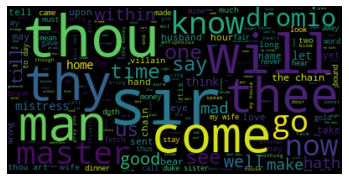

In [73]:
# Start with one review:
text = df2.text_stemmed[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

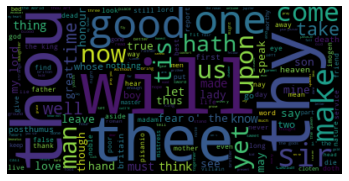

In [74]:
# Start with one review:
text = df2.text_stemmed[7]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
# Combine all text
list_all = []
for x in range(0,36):
    list_all.append(df2['text_stemmed'].iloc[x])

In [85]:
list_all[7] == df2['text_stemmed'].iloc[7]

True

In [95]:
my_stops = default_stop+['shall', 'hath', 'll', 'would', 'come', 'go',
                         'thee', 'thy', 'thou', 'tis', 'like', 'well', 'upon' ,'let','one',
                        'ay', 'yet','may', 'make', 'us','see', 'know', 'give', 'unto', 'doth', 'must',
                        'much','tell','made','day','mine', 'never', 'ever', 'think', 'take','though', 'st',
                        'done','call','art','therefore','two','nay','away','way','ye',
                        'three','thus','indeed','comes','hear','whose','er','hi','ti','u',
                        "i'll"]+split_players

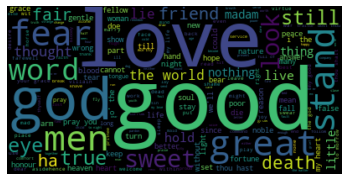

In [96]:
# Start with one review:
text = str(list_all)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=my_stops).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

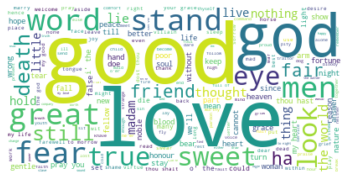

In [97]:
# Start with one review:
text = str(list_all)

# Create and generate a word cloud image:
wordcloud2 = WordCloud(background_color="white", stopwords=my_stops).generate(text)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [98]:
# Save the image:
wordcloud.to_file("all_plays.png")
wordcloud2.to_file("all_plays_white.png")

In [ ]:
# Plays by similarity groups (about 5?)

In [247]:
#capturing the best match for each play

#looping through each play
for j in range(0,36):
    simularity = 0
    q = 0
    
    #looping through every other play
    for i in range(1,36):
        if i != j:
            
            #if the simularity is greater than a previously seen simularity, replace it and set the play name
            if cosine_similarity((doc_topic_nmf.values[j], doc_topic_nmf.values[i]))[1][0] > simularity:
                simularity = cosine_similarity((doc_topic_nmf.values[j], doc_topic_nmf.values[i]))[1][0]
                q = i
                
    print("{} is best matched with {} at {}% similarity.".format(df2.Play[j], df2.Play[q],round(simularity*100, 2)))

A Comedy Of Errors is best matched with Merry Wives Of Windsor at 97.52% similarity.
A Midsummer Nights Dream is best matched with Two Gentlemen Of Verona at 98.14% similarity.
A Winters Tale is best matched with The Tempest at 99.69% similarity.
Alls Well That Ends Well is best matched with Othello at 96.66% similarity.
Antony And Cleopatra is best matched with Cymbeline at 97.26% similarity.
As You Like It is best matched with Twelfth Night at 97.69% similarity.
Coriolanus is best matched with Antony And Cleopatra at 87.51% similarity.
Cymbeline is best matched with The Tempest at 99.96% similarity.
Hamlet is best matched with King Lear at 95.73% similarity.
Henry Iv is best matched with Henry V at 91.87% similarity.
Henry V is best matched with Troilus And Cressida at 93.37% similarity.
Henry Vi Part 1 is best matched with Richard Ii at 99.27% similarity.
Henry Vi Part 2 is best matched with Titus Andronicus at 98.86% similarity.
Henry Vi Part 3 is best matched with Richard Iii at 9

In [248]:
#capturing the worst match for each play

#looping through each play
for j in range(0,36):
    simularity = 100
    q = 0
    
    #looping through every other play
    for i in range(1,36):
        if i != j:
            
            #if the simularity is greater than a previously seen simularity, replace it and set the play name
            if cosine_similarity((doc_topic_nmf.values[j], doc_topic_nmf.values[i]))[1][0] < simularity:
                simularity = cosine_similarity((doc_topic_nmf.values[j], doc_topic_nmf.values[i]))[1][0]
                q = i
                
    print("{} is worst matched with {} at {}% similarity.".format(df2.Play[j], df2.Play[q],round(simularity*100, 2)))

A Comedy Of Errors is worst matched with Loves Labours Lost at 0.0% similarity.
A Midsummer Nights Dream is worst matched with Henry Viii at 1.19% similarity.
A Winters Tale is worst matched with Henry V at 8.98% similarity.
Alls Well That Ends Well is worst matched with Richard Ii at 3.56% similarity.
Antony And Cleopatra is worst matched with Merry Wives Of Windsor at 0.68% similarity.
As You Like It is worst matched with Henry Vi Part 2 at 7.2% similarity.
Coriolanus is worst matched with Merry Wives Of Windsor at 0.0% similarity.
Cymbeline is worst matched with Merry Wives Of Windsor at 2.62% similarity.
Hamlet is worst matched with Henry V at 13.87% similarity.
Henry Iv is worst matched with Two Gentlemen Of Verona at 2.68% similarity.
Henry V is worst matched with Two Gentlemen Of Verona at 0.61% similarity.
Henry Vi Part 1 is worst matched with Merry Wives Of Windsor at 0.0% similarity.
Henry Vi Part 2 is worst matched with Two Gentlemen Of Verona at 0.54% similarity.
Henry Vi P

In [109]:
list1 = ['A Comedy Of Errors' , 'Merry Wives Of Windsor', 'Taming Of The Shrew', 'Merchant Of Venice', 
         'Measure For Measure']
# find the best match, then that best match's best match, repeat         

list2 = ['A Midsummer Nights Dream', 'Two Gentlemen Of Verona', 'Loves Labours Lost', 'Romeo And Juliet']

list3 = ['A Winters Tale' , 'The Tempest', 'Cymbeline', 'Antony And Cleopatra', 'Coriolanus', 'Hamlet','King Lear'
         , 'Henry Viii', 'Pericles', 'Timon Of Athens', 'Macbeth', 'Julius Caesar' ]

list4 = ['Alls Well That Ends Well', 'Othello',]

list5 = ['As You Like It' , 'Twelfth Night', 'Much Ado About Nothing']

list6 = ['Henry Iv' , 'Henry V', 'Troilus And Cressida']

list7 = ['Henry Vi Part 1',  'Richard Ii', 'King John']

list8 = ['Henry Vi Part 2', 'Titus Andronicus', 'Richard Iii', 'Henry Vi Part 3']

In [111]:
#double check that all plays are captured
all_of_the_lists = list1+list2+list3+list4+list5+list6+list7+list8
len(all_of_the_lists)

36

In [209]:
df_list1 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list1:
    df_list1 = df_list1.append(df2.loc[df2['Play'] == play])
df_list1

,Play,PlayerLine,text_stemmed
0,A Comedy Of Errors,"proceed, solinus, to procure my fall,and by th...",proceed solinus to procure my fall and by th...
21,Merry Wives Of Windsor,"sir hugh, persuade me not, i will make a star-...",sir hugh persuade me not i will make a star-...
28,Taming Of The Shrew,"i'll pheeze you, in faith.,a pair of stocks, y...",i'll pheeze you in faith a pair of stocks y...
20,Merchant Of Venice,"in sooth, i know not why i am so sad:,it weari...",in sooth i know not why i am so sad it weari...
19,Measure For Measure,"escalus.,my lord.,of government the properties...",escalus my lord of government the properties...


In [210]:
df_list2 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list2:
    df_list2 = df_list2.append(df2.loc[df2['Play'] == play])
df_list2

,Play,PlayerLine,text_stemmed
1,A Midsummer Nights Dream,"now, fair hippolyta, our nuptial hour,draws on...",now fair hippolyta our nuptial hour draws on...
34,Two Gentlemen Of Verona,"cease to persuade, my loving proteus:,home-kee...",cease to persuade my loving proteus home-kee...
18,Loves Labours Lost,"let fame, that all hunt after in their lives,,...",let fame that all hunt after in their lives ...
27,Romeo And Juliet,"two households, both alike in dignity,,in fair...",two households both alike in dignity in fair...


In [211]:
df_list3 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list3:
    df_list3 = df_list3.append(df2.loc[df2['Play'] == play])
df_list3

,Play,PlayerLine,text_stemmed
2,A Winters Tale,"if you shall chance, camillo, to visit bohemia...",if you shall chance camillo to visit bohemia...
29,The Tempest,"boatswain!,here, master: what cheer?,good, spe...",boatswain here master what cheer good spe...
7,Cymbeline,"you do not meet a man but frowns: our bloods,n...",you do not meet a man but frowns our bloods n...
4,Antony And Cleopatra,"nay, but this dotage of our general's,o'erflow...",nay but this dotage of our general's o'erflow...
6,Coriolanus,"before we proceed any further, hear me speak.,...",before we proceed any further hear me speak ...
8,Hamlet,"who's there?,nay, answer me: stand, and unfold...",who's there nay answer me stand and unfold...
17,King Lear,i thought the king had more affected the duke ...,i thought the king had more affected the duke ...
14,Henry Viii,"i come no more to make you laugh: things now,,...",i come no more to make you laugh things now ...
24,Pericles,"to sing a song that old was sung,,from ashes a...",to sing a song that old was sung from ashes a...
30,Timon Of Athens,"good day, sir.,i am glad you're well.,i have n...",good day sir i am glad you're well i have n...


In [212]:
df_list4 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list4:
    df_list4 = df_list4.append(df2.loc[df2['Play'] == play])
df_list4

,Play,PlayerLine,text_stemmed
3,Alls Well That Ends Well,"in delivering my son from me, i bury a second ...",in delivering my son from me i bury a second ...
23,Othello,"tush! never tell me, i take it much unkindly,t...",tush never tell me i take it much unkindly t...


In [213]:
df_list5 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list5:
    df_list5 = df_list5.append(df2.loc[df2['Play'] == play])
df_list5

,Play,PlayerLine,text_stemmed
5,As You Like It,"as i remember, adam, it was upon this fashion,...",as i remember adam it was upon this fashion ...
33,Twelfth Night,"if music be the food of love, play on,,give me...",if music be the food of love play on give me...
22,Much Ado About Nothing,i learn in this letter that don peter of arrag...,i learn in this letter that don peter of arrag...


In [214]:
df_list6 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list6:
    df_list6 = df_list6.append(df2.loc[df2['Play'] == play])
df_list6

,Play,PlayerLine,text_stemmed
9,Henry Iv,"so shaken as we are, so wan with care,,find we...",so shaken as we are so wan with care find we...
10,Henry V,"o for a muse of fire, that would ascend,the br...",o for a muse of fire that would ascend the br...
32,Troilus And Cressida,"in troy, there lies the scene. from isles of g...",in troy there lies the scene from isles of g...


In [215]:
df_list7 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list7:
    df_list7 = df_list7.append(df2.loc[df2['Play'] == play])
df_list7

,Play,PlayerLine,text_stemmed
11,Henry Vi Part 1,"hung be the heavens with black, yield day to n...",hung be the heavens with black yield day to n...
25,Richard Ii,"old john of gaunt, time-honour'd lancaster,,ha...",old john of gaunt time-honour'd lancaster ha...
16,King John,"now, say, chatillon, what would france with us...",now say chatillon what would france with us...


In [216]:
df_list8 = pd.DataFrame(columns=['Play', 'PlayerLine','text_stemmed'])
for play in list8:
    df_list8 = df_list8.append(df2.loc[df2['Play'] == play])
df_list8

,Play,PlayerLine,text_stemmed
12,Henry Vi Part 2,"as by your high imperial majesty,i had in char...",as by your high imperial majesty i had in char...
31,Titus Andronicus,"noble patricians, patrons of my right,,defend ...",noble patricians patrons of my right defend ...
26,Richard Iii,"now is the winter of our discontent,made glori...",now is the winter of our discontent made glori...
13,Henry Vi Part 3,"i wonder how the king escaped our hands.,while...",i wonder how the king escaped our hands while...


In [237]:
my_stops = default_stop+['shall', 'hath', 'll', 'would', 'come', 'go',
                         'thee', 'thy', 'thou', 'tis', 'like', 'well', 'upon' ,'let','one',
                        'ay', 'yet','may', 'make', 'us','see', 'know', 'give', 'unto', 'doth', 'must',
                        'much','tell','made','day','mine', 'never', 'ever', 'think', 'take','though', 'st',
                        'done','call','art','therefore','two','nay','away','way','ye',
                        'three','thus','indeed','comes','hear','whose','er','hi','ti','u',
                        "i'll", 'nName', 'text_stemmed', 'dtype' 'object', 'ha', 'good','god','love']+split_players

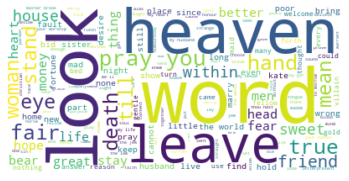

In [238]:

# Create and generate a word cloud image:
wordcloud_list1 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list1['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list1, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list1.to_file("list1.png")


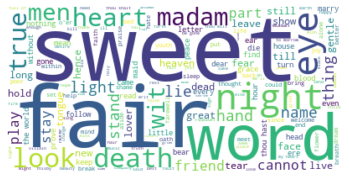

In [239]:

# Create and generate a word cloud image:
wordcloud_list2 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list2['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list2.to_file("list2.png")


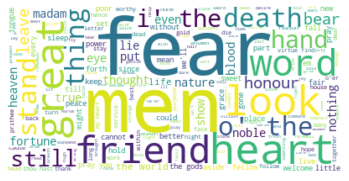

In [240]:

# Create and generate a word cloud image:
wordcloud_list3 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list3['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list3, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list3.to_file("list3.png")


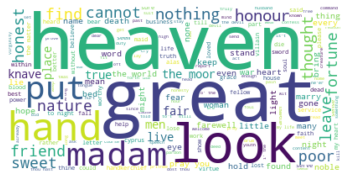

In [241]:

# Create and generate a word cloud image:
wordcloud_list4 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list4['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list4, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list4.to_file("list4.png")


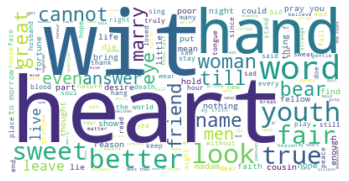

In [242]:

# Create and generate a word cloud image:
wordcloud_list5 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list5['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list5, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list5.to_file("list5.png")


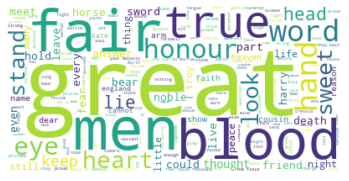

In [243]:

# Create and generate a word cloud image:
wordcloud_list6 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list6['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list6, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list6.to_file("list6.png")


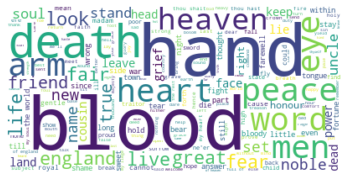

In [244]:

# Create and generate a word cloud image:
wordcloud_list7 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list7['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list7, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list7.to_file("list7.png")


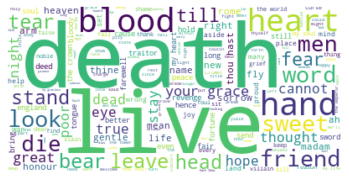

In [245]:

# Create and generate a word cloud image:
wordcloud_list8 = WordCloud(background_color="white", stopwords=my_stops).generate(' '.join(df_list8['text_stemmed']))

# Display the generated image:
plt.imshow(wordcloud_list8, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image:
wordcloud_list8.to_file("list8.png")


In [246]:
# #Plays a tone to bring attention to a completed notebook

import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0